In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [3]:
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

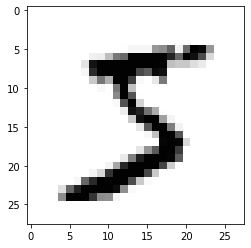

In [4]:
plt.imshow(X_train[0], cmap='Greys')

In [5]:
#1차원 배열로 data reshape
X_train_reshaped = X_train.reshape(60000, 784)
X_test_reshaped = X_test.reshape(10000, 784)
print(X_train_reshaped.shape)
print(X_test_reshaped.shape)

(60000, 784)
(10000, 784)


In [6]:
#Normalization, 255로 나누어 0~1사이의 값으로 바꿈.
X_train_n = X_train_reshaped.astype('float32')
X_test_n = X_test_reshaped.astype('float32')

gray_scale = 255
X_train_n = X_train_n / gray_scale
X_test_n = X_test_n / gray_scale
print(X_train_n[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [7]:
#one hot encoder
y_train_n = y_train.astype('float32')
y_test_n = y_test.astype('float32')

y_train_one = tf.one_hot(y_train_n,depth=10)
y_test_one = tf.one_hot(y_test_n,depth=10)

print(y_train_one.shape)
print(y_test_one.shape)

(60000, 10)
(10000, 10)


In [8]:
#Normalization, 255로 나누어 0~1사이의 값으로 바꿈.
X_train_n = X_train_reshaped.astype('float32')
X_test_n = X_test_reshaped.astype('float32')

gray_scale = 255
X_train_n = X_train_n / gray_scale
X_test_n = X_test_n / gray_scale
print(X_train_n[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [9]:
#one hot encoder
y_train_n = y_train.astype('float32')
y_test_n = y_test.astype('float32')

y_train_one = tf.one_hot(y_train_n,depth=10)
y_test_one = tf.one_hot(y_test_n,depth=10)

print(y_train_one.shape)
print(y_test_one.shape)

(60000, 10)
(10000, 10)


In [12]:
from tensorflow import keras
from keras import layers

#MLP 모델 생성
model = keras.Sequential()
model.add(layers.Dense(512, input_dim=784, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

#모델 compile
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

#모델 학습
batch_size = 64
epochs = 50

history = model.fit(X_train_n, y_train_one, validation_split = 0.2,
                   batch_size = batch_size, epochs = epochs)

#모델 평가
loss_test, acc_test = model.evaluate(X_test_n, y_test_one)

print('loss_test',loss_test)
print('acc_test',acc_test)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
750/750 [==============================] - 2s 3ms/step - loss: 0.2562 - accuracy: 0.9266 - val_loss: 0.1305 - val_accuracy: 0.9620
Epoch 2/50
750/750 [==============================] - 2s 3ms/step - loss: 0.1024 - accuracy: 0.9697 - val_loss: 0.0990 - val_accuracy: 0.9695
Epoch 3/50
750/750 [==============================] - 2s 3ms/step - loss: 0.0669 - accuracy: 0.9796 - val_loss: 0.0865 - val_accuracy: 0.9742
Epoch 4/50
750/750 [